In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/coffee_sales_data.csv")

In [3]:
df.head() # first 5 rows of the data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
df.info()  # information about dataset: rows, columns, null values, dtype

# card: Column as 2534 entries, there are missing values in this column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623 entries, 0 to 2622
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2623 non-null   object 
 1   datetime     2623 non-null   object 
 2   cash_type    2623 non-null   object 
 3   card         2534 non-null   object 
 4   money        2623 non-null   float64
 5   coffee_name  2623 non-null   object 
dtypes: float64(1), object(5)
memory usage: 123.1+ KB


In [5]:
duplicated_row = df[df.duplicated(keep=False)]  # check for duplicate values
print("Number of duplicated rows in dataset: ",len(duplicated_row))


# There are zero duplicate rows in the dataset.

Number of duplicated rows in dataset:  0


In [6]:
# Handling missing values in card column:
missing_value = df[df['card'].isnull()]
missing_value

# Missing values are for cash_type = cash. Since the payment is made for cash,
# there is no card number associated with it. So we can igonre or replace Nan value with "unkown"
# I will replace it with unknow for practice purpose

df['card'].fillna('unknown',inplace=True) # filling missing value with "unknown"
df.info()  # verify if missing values are replaced by "unknown"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623 entries, 0 to 2622
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2623 non-null   object 
 1   datetime     2623 non-null   object 
 2   cash_type    2623 non-null   object 
 3   card         2623 non-null   object 
 4   money        2623 non-null   float64
 5   coffee_name  2623 non-null   object 
dtypes: float64(1), object(5)
memory usage: 123.1+ KB


<ipython-input-6-754d0c5a0d65>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['card'].fillna('unknown',inplace=True) # filling missing value with "unknown"


In [7]:
# date and datetime column conversion to datetime format
df.head()

# convert datetime column to hour. Remove date since date is avialable in date column
df['hours']=pd.to_datetime(df['datetime']).dt.hour

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623 entries, 0 to 2622
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2623 non-null   object 
 1   datetime     2623 non-null   object 
 2   cash_type    2623 non-null   object 
 3   card         2623 non-null   object 
 4   money        2623 non-null   float64
 5   coffee_name  2623 non-null   object 
 6   hours        2623 non-null   int32  
dtypes: float64(1), int32(1), object(5)
memory usage: 133.3+ KB


In [8]:
df['money'].describe()

,money
count,2623.000000
mean,31.889478
std,5.015394
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


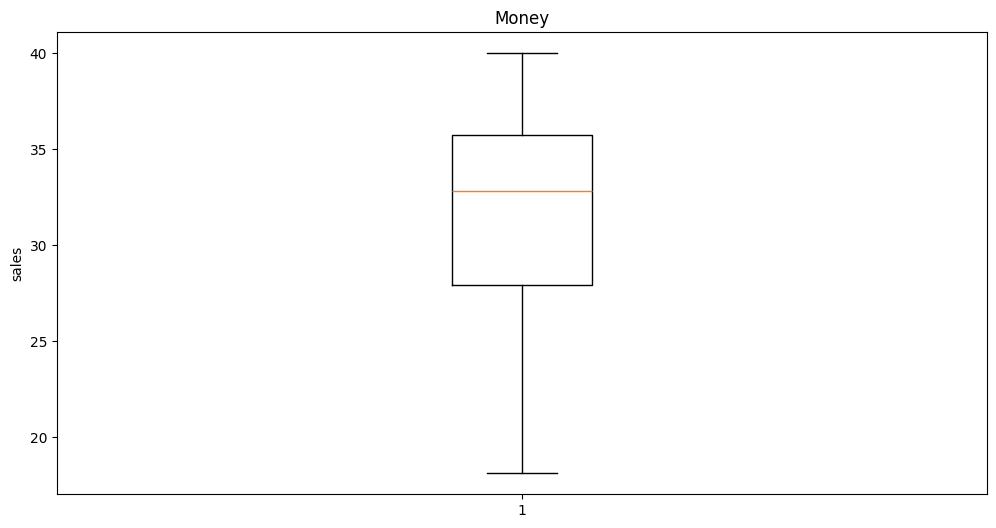

'\nIQR = Q3 -Q1 \nlower bound = 1-1.5* IQR\nupper bound = 1+1.5*IQR\n'

In [9]:
# Check for outlier in the money column using box plot

# Plot 1: Money column
plt.figure(figsize=(12,6))
plt.boxplot(df['money'])
plt.ylabel("sales")
plt.title("Money")
plt.show()

'''
IQR = Q3 -Q1
lower bound = 1-1.5* IQR
upper bound = 1+1.5*IQR
'''

# We don't have outlier in our data based on IQR method

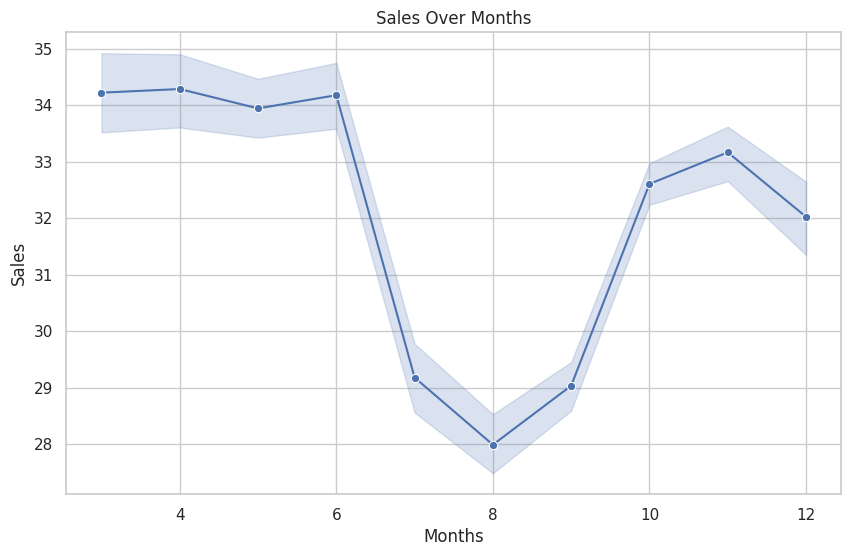

In [10]:
# Sales trends over entire timeline;
df.head()  # Start date of entry is 24-03-01
df.tail() # last date of entry is 24-12-23

# Lets create a month column:
df['month'] = pd.to_datetime(df['date']).dt.month

# PLot the sales trend from 24-03-01 to 24-12-23
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='money', marker='o')

# Customize the plot
plt.title('Sales Over Months')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

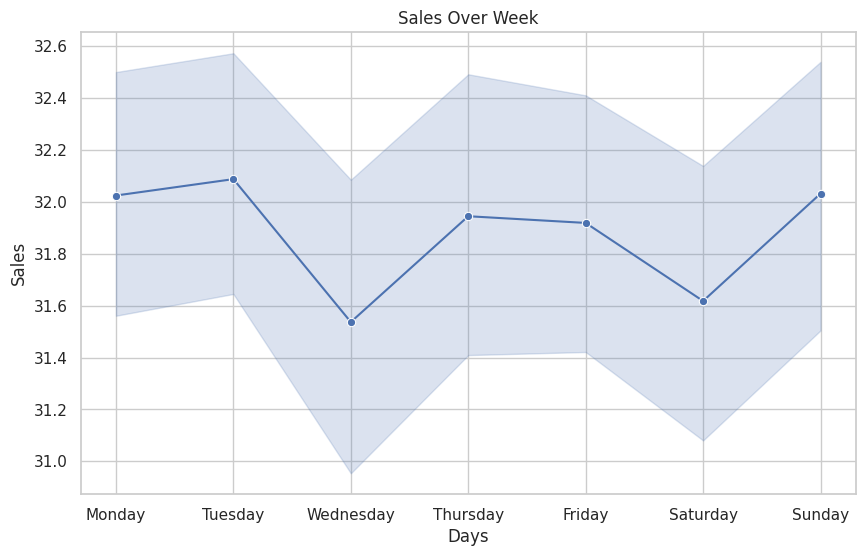

In [11]:
# Sales over Week

# Let's create a weekday column
df['day'] = pd.to_datetime(df['date']).dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)

# PLot the sales trend during a week
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.sort_values('day'), x='day', y='money', marker='o')

# Customize the plot
plt.title('Sales Over Week')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

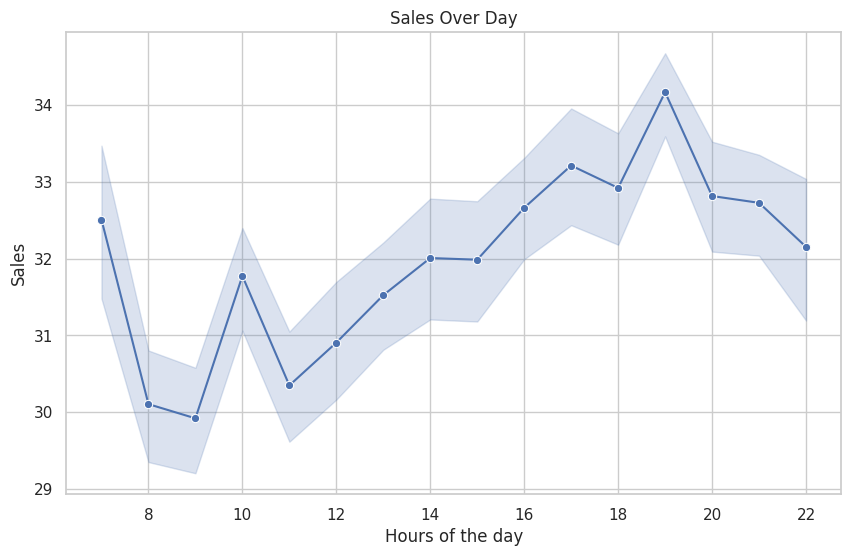

In [12]:
# Sales during day time (hours)

# PLot the sales trend during a day
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hours', y='money', marker='o')

# Customize the plot
plt.title('Sales Over Day')
plt.xlabel('Hours of the day')
plt.ylabel('Sales')
plt.show()

In [13]:
# Popular coffee
df['coffee_name'].unique()
print("Number of different Coffee Types served: ",len(df['coffee_name'].unique()))

Number of different Coffee Types served:  8


In [14]:
coffee_transcation = df['coffee_name'].value_counts()
coffee_transcation

coffee_label = ['Americano with Milk','Latte', 'Cappuccino','Americano','Cortado','Hot Chocolate', 'Cocoa', 'Espresso']

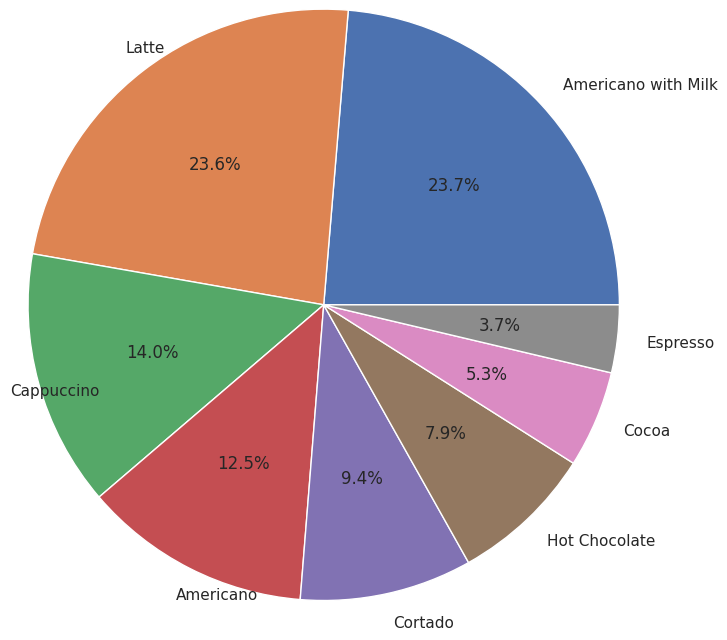

In [15]:
# Coffee proprotion
coffee_label = ['Americano with Milk','Latte', 'Cappuccino','Americano','Cortado','Hot Chocolate', 'Cocoa', 'Espresso']
plt.pie(coffee_transcation, radius=2, center=(10, 6), autopct='%1.1f%%', labels =coffee_label)
plt.show()

Text(0.5, 1.0, 'Popular Coffee')

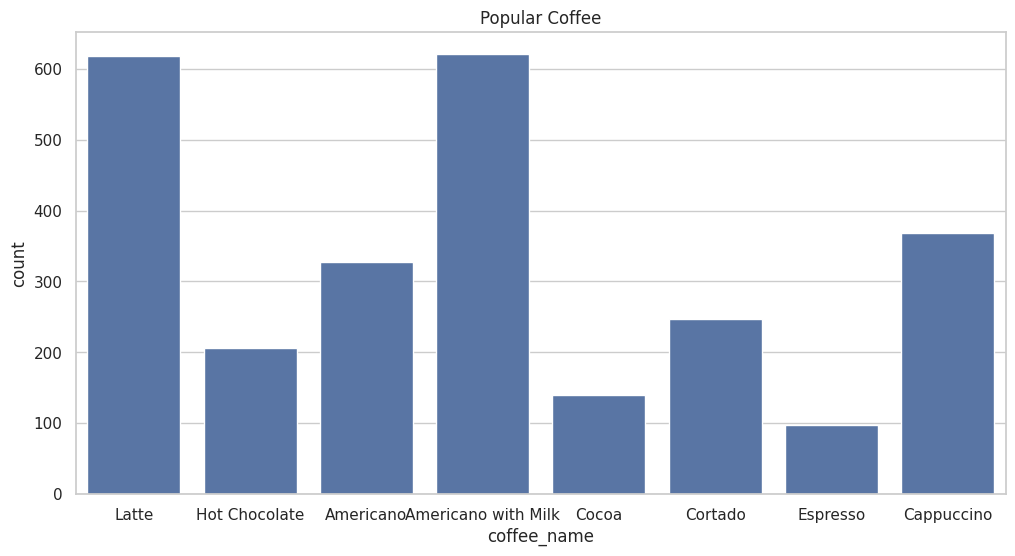

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x ='coffee_name')
plt.title("Popular Coffee" )

In [17]:
# Coffee contribution to sales:
most_sales = df.groupby('coffee_name')['money'].sum()
most_sales

,money
coffee_name,
Americano,8546.30
Americano with Milk,19004.54
Cappuccino,13278.06
Cocoa,4959.12
Cortado,6366.66
Espresso,2035.06
Hot Chocolate,7454.70
Latte,22001.66


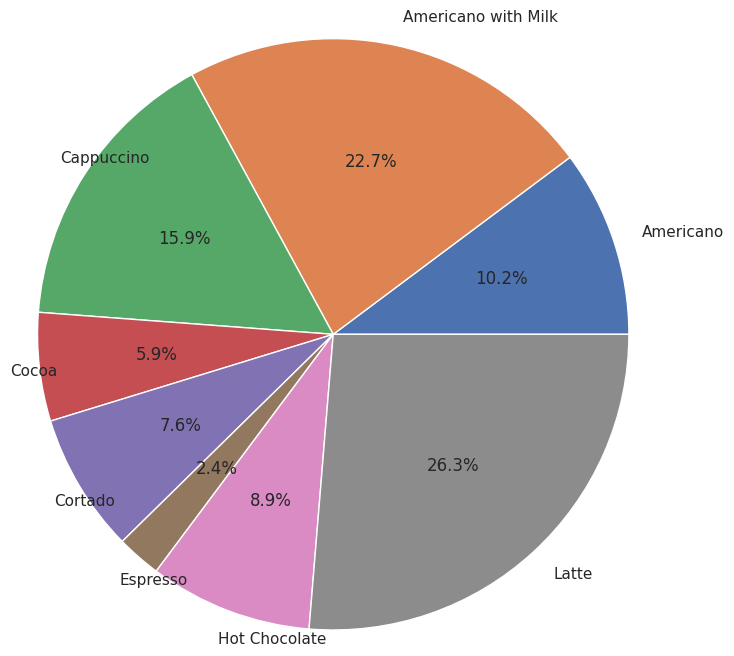

In [18]:
# Plot Pie chart to show the coffee type contributing most to sales.
coffee_label = ['Americano','Americano with Milk','Cappuccino','Cocoa','Cortado', 'Espresso','Hot Chocolate', 'Latte']

plt.pie(most_sales, radius = 2, labels= coffee_label,center=(12, 6), autopct='%1.1f%%')
plt.show()

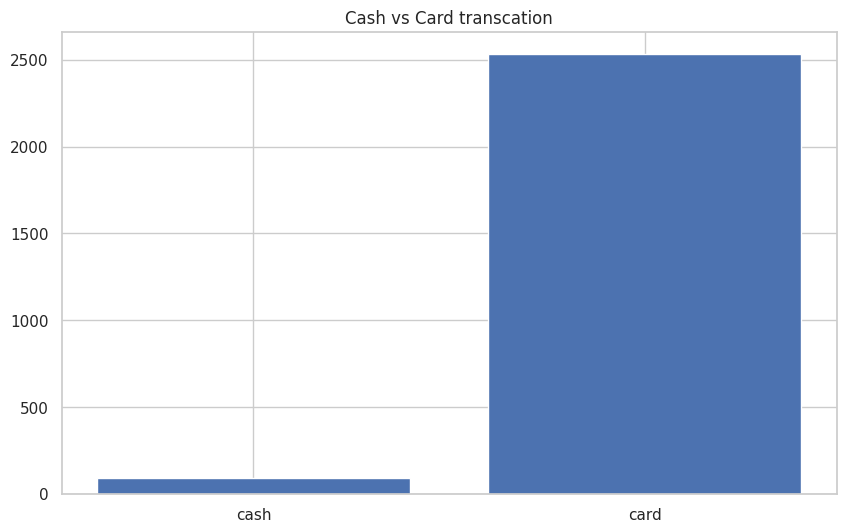

In [19]:
# Cash vs Card purchases:
df['cash_type'].unique()
# Proportion of cash vs card transcation
cash = df[df['cash_type']=='cash']
card = df[df['cash_type']== 'card']

x = ['cash', 'card']
y = [len(cash),len(card)]

plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.title("Cash vs Card transcation")
plt.show()

In [20]:
# very small percentage of cash transcation are done in the coffee show.
cash.head()
cash['money'].describe()

,money
count,89.000000
mean,35.797753
std,4.910980
min,24.000000
25%,30.000000
50%,39.000000
75%,40.000000
max,40.000000


In [21]:
card['money'].describe()

,money
count,2534.000000
mean,31.752210
std,4.964331
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,38.700000
